In [1]:
#%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import train_multi_rnn

import sys
sys.path.append('../utils')
from spike_train_visual import *
from read_spike_train import *

# hyperparameters
train_multi_rnn.time_bin=1
train_multi_rnn.multiplier=1
train_multi_rnn.end_symbol = -1

train_multi_rnn.keep_prob = 1.0
train_multi_rnn.pos_weight = 1
train_multi_rnn.max_grad_norm = 5

train_multi_rnn.max_epoch=10
train_multi_rnn.reg=0.0
train_multi_rnn.learning_rate=0.05

train_multi_rnn.batch_size=1
train_multi_rnn.num_steps=1000
train_multi_rnn.cell_size = 256

In [4]:
#orders=np.arange(85)
#np.random.shuffle(orders)
#print ','.join(map(str,list(orders)))
orders=np.array([60,9,19,70,55,61,71,13,75,30,44,43,84,83,66,80,40,26,1,42,63,41,50,78,74,18,46,69,3,58,5,51,31,59,67,4,15,29,54,68,36,17,37,14,62,8,23,38,49,65,22,21,76,6,48,39,7,47,56,10,45,79,64,52,35,25,28,0,81,72,20,34,53,82,33,77,32,24,16,11,12,27,73,2,57])
print orders

[60  9 19 70 55 61 71 13 75 30 44 43 84 83 66 80 40 26  1 42 63 41 50 78 74
 18 46 69  3 58  5 51 31 59 67  4 15 29 54 68 36 17 37 14 62  8 23 38 49 65
 22 21 76  6 48 39  7 47 56 10 45 79 64 52 35 25 28  0 81 72 20 34 53 82 33
 77 32 24 16 11 12 27 73  2 57]


In [3]:
#data=np.genfromtxt('/home/honglei/projects/neural_network/data/small/truncated_23_0001.csv', delimiter=',')
# #print data[0:5,orders]
# #data[:,[6,12]]=data[:,[12,6]]
# np.savetxt('/home/honglei/projects/neural_network/data/shuffle/truncated_23_0001.csv',data[:,orders],fmt='%d',delimiter=',')

# data1=np.genfromtxt('/home/honglei/projects/neural_network/data/small/truncated_23_0001.csv', delimiter=',')
# data2=np.genfromtxt('/home/honglei/projects/neural_network/data/shuffle/truncated_23_0001.csv', delimiter=',')
# print np.linalg.norm(data1[:,orders]-data2)
# print np.linalg.norm(data1[:,9]-data2[:,1])


#np.savetxt('/home/honglei/projects/neural_network/data/single_ch/6_alone.csv',data[:,12],fmt='%d',delimiter=',')

# data=np.genfromtxt('/home/honglei/projects/neural_network/data/I1923_0001.csv', delimiter=',')
# np.savetxt('/home/honglei/projects/neural_network/data/small1/truncated_23_0001.csv',data[0:10000,],fmt='%d',delimiter=',')
# data=np.genfromtxt('/home/honglei/projects/neural_network/data/I1921_0001.csv', delimiter=',')
# np.savetxt('/home/honglei/projects/neural_network/data/small1/truncated_21_0001.csv',data[0:10000,],fmt='%d',delimiter=',')

data=np.genfromtxt('/home/honglei/projects/heterlearning/data/shuffle_23/23_01.csv', delimiter=',')
for i in range(2, 6):
    orders=np.arange(data.shape[1])
    np.random.shuffle(orders)
    print ','.join(map(str,list(orders)))
    np.savetxt('/home/honglei/projects/heterlearning/data/shuffle_23/23_0{0}.csv'.format(i),data[:,orders],fmt='%d',delimiter=',')

72,52,24,42,55,38,34,51,67,23,3,65,39,33,40,54,21,77,83,17,35,80,48,79,31,75,44,68,10,2,27,16,18,4,37,70,6,62,47,12,53,26,0,41,50,73,29,61,7,84,58,9,15,66,71,30,49,11,43,13,82,25,36,57,20,59,14,64,69,28,78,5,22,76,45,63,60,1,19,8,46,32,74,81,56
57,59,15,60,80,29,12,74,58,51,13,48,23,28,4,67,1,38,27,31,53,10,45,66,20,6,19,63,7,73,56,72,49,71,9,42,68,46,47,0,34,83,77,3,14,32,18,55,41,65,26,69,84,43,36,54,61,21,37,78,25,50,52,82,22,16,62,17,40,2,76,8,64,35,70,39,75,30,11,5,44,81,79,24,33
53,6,48,60,15,18,61,1,29,43,82,10,64,22,12,76,78,66,38,36,75,49,20,13,58,62,25,42,41,21,24,73,26,77,7,30,69,71,23,35,45,5,4,32,39,56,19,80,40,52,65,3,70,27,31,46,9,16,37,28,51,79,34,47,14,68,44,59,57,11,72,83,8,84,67,17,50,33,2,74,81,63,54,0,55
7,39,43,74,2,11,10,47,83,45,71,15,76,0,48,70,75,57,77,59,23,68,36,49,12,37,46,44,14,22,73,30,51,64,29,27,78,24,3,28,42,54,53,35,84,40,8,80,72,17,82,16,55,19,61,56,79,26,18,4,1,69,31,58,60,5,32,81,13,52,21,63,25,34,20,33,62,67,9,6,66,38,65,50,41


In [2]:
with tf.device('/gpu:1'):
    train_multi_rnn.FLAGS.log_dir='/home/honglei/projects/heterlearning/log_dir'
    m=train_multi_rnn.TrainMultiRNN('/home/honglei/projects/heterlearning/data/hc_data/test/', fix_shared=True)
m.train()

Reading data
-------------------
Building model

Building model for ec012ec.187.st with label 0
Training variables:
model/ec012ec.187.st/input_w:0
model/ec012ec.187.st/rec_bias:0

Building model for ec012ec.188.st with label 0
Training variables:
model/ec012ec.188.st/input_w:0
model/ec012ec.188.st/rec_bias:0

Building model for ec012ec.239.st with label 2
Training variables:
model/ec012ec.239.st/input_w:0
model/ec012ec.239.st/rec_bias:0

Building model for ec012ec.228.st with label 1
Training variables:
model/ec012ec.228.st/input_w:0
model/ec012ec.228.st/rec_bias:0

Building model for ec012ec.227.st with label 1
Training variables:
model/ec012ec.227.st/input_w:0
model/ec012ec.227.st/rec_bias:0

Shared variables:
model/shared_variables/Cell0/Linear/Matrix:0
model/shared_variables/Cell0/Linear/Bias:0
model/shared_variables/softmax_w:0
-------------------
Starting session
0/91 loss: 0.693 speed: 1 batches/sec
18/91 loss: 0.666 speed: 2 batches/sec
36/91 loss: 0.469 speed: 2 batches/sec
54

In [3]:
with tf.device('/gpu:1'):
    train_multi_rnn.FLAGS.log_dir='/home/honglei/projects/heterlearning/log_dir'
    m=train_multi_rnn.TrainMultiRNN('/home/honglei/projects/heterlearning/data/shuffle', fix_shared=True)

Reading data
(8000, 85)
Building model
False
model/shared_variables/Cell0
Training variables: [u'model/truncated_23_0001.csv/input_w:0']
Shared variables: [u'model/shared_variables/Cell0/Linear/Matrix:0', u'model/shared_variables/Cell0/Linear/Bias:0']
Starting session
model/truncated_23_0001.csv/input_w:0
model/shared_variables/Cell0/Linear/Matrix:0
model/shared_variables/Cell0/Linear/Bias:0
model/truncated_23_0001.csv/model/truncated_23_0001.csv/input_w/RMSProp:0
model/truncated_23_0001.csv/model/truncated_23_0001.csv/input_w/RMSProp_1:0


In [4]:
m.partially_train('/home/honglei/projects/heterlearning/log_dir/test_small.ckt')

8000
100
80
0/80 loss: 0.693 speed: 5 batches/sec
8/80 loss: 0.689 speed: 14 batches/sec
16/80 loss: 0.685 speed: 16 batches/sec
24/80 loss: 0.678 speed: 17 batches/sec
32/80 loss: 0.670 speed: 17 batches/sec
40/80 loss: 0.659 speed: 17 batches/sec
48/80 loss: 0.645 speed: 17 batches/sec
56/80 loss: 0.628 speed: 17 batches/sec
64/80 loss: 0.605 speed: 17 batches/sec
72/80 loss: 0.581 speed: 17 batches/sec
Epoch: 1 Train Loss: 0.559
Epoch: 1 Train ROC-AUC: 0.519, PR-AUC: 0.003
Saving latest results.
Epoch: 1 Valid ROC-AUC: 0.547, PR-AUC: 0.009
8000
100
80
0/80 loss: 0.289 speed: 20 batches/sec
8/80 loss: 0.225 speed: 20 batches/sec
16/80 loss: 0.194 speed: 20 batches/sec
24/80 loss: 0.168 speed: 20 batches/sec
32/80 loss: 0.145 speed: 20 batches/sec
40/80 loss: 0.126 speed: 19 batches/sec
48/80 loss: 0.112 speed: 19 batches/sec
56/80 loss: 0.101 speed: 19 batches/sec
64/80 loss: 0.091 speed: 19 batches/sec
72/80 loss: 0.084 speed: 19 batches/sec
Epoch: 2 Train Loss: 0.079
Epoch: 2 Train

In [5]:
m.restore('/home/honglei/projects/neural_network/log_dir/test_small.ckt')
origin_inputw=m.get_value_of_variable('model/truncated_23_0001.csv/input_w:0')
m.restore('/home/honglei/projects/neural_network/log_dir/test_shuffle.ckt')
shuffle_inputw=m.get_value_of_variable('model/truncated_23_0001.csv/input_w:0')
d2=[]
for i in range(50):
    rand_orders=np.arange(85)
    np.random.shuffle(rand_orders)
    rand_inputw=shuffle_inputw[rand_orders,:]
    d2.append(np.linalg.norm(origin_inputw-rand_inputw))
print d2
d1=[np.linalg.norm(origin_inputw-shuffle_inputw)]*len(d2)
d3=[np.linalg.norm(origin_inputw[orders,:]-shuffle_inputw)]*len(d2)
plt.boxplot([d1,d2,d3],0,'')
plt.xticks([1,2,3], ['w1-w2', 'w1-shuffled_w2','w1-reordered_w2'])
plt.ylabel('L2 norm')
plt.show()

[189.01253, 189.10707, 186.18031, 188.3015, 185.95229, 186.07175, 187.41185, 189.49435, 190.12299, 187.86702, 185.88139, 184.6797, 185.27435, 188.62473, 186.93918, 187.25377, 191.1053, 184.9077, 188.96356, 190.37833, 187.09399, 189.00517, 185.9955, 185.22289, 183.06477, 188.20303, 187.5865, 188.41893, 185.93799, 186.86914, 185.96077, 188.03783, 185.57463, 185.58244, 186.73927, 185.82025, 187.6485, 188.54814, 187.71747, 184.41495, 185.69759, 189.38234, 186.68858, 184.88885, 186.71269, 188.66484, 185.88707, 188.01375, 186.65341, 187.98712]


In [11]:
m.restore('/home/honglei/projects/neural_network/log_dir/test_shuffle_small.ckt')
origin_inputw=m.get_value_of_variable('model/truncated_23_0001.csv/input_w:0')
shuffle_inputw=m.get_value_of_variable('model/shuffle.csv/input_w:0')
# d2=[]
# for i in range(50):
#     rand_orders=np.arange(85)
#     np.random.shuffle(rand_orders)
#     rand_inputw=shuffle_inputw[rand_orders,:]
#     d2.append(np.linalg.norm(origin_inputw-rand_inputw))
# print d2
# d1=[np.linalg.norm(origin_inputw-shuffle_inputw)]*len(d2)
# d3=[np.linalg.norm(origin_inputw[orders,:]-shuffle_inputw)]*len(d2)
# plt.boxplot([d1,d2,d3],0,'')
# plt.xticks([1,2,3], ['w1-w2', 'w1-shuffled_w2','w1-reordered_w2'])
# plt.ylabel('L2 norm')
# plt.show()

data1=np.genfromtxt('/home/honglei/projects/neural_network/data/shuffle_small//truncated_23_0001.csv', delimiter=',')
data2=np.genfromtxt('/home/honglei/projects/neural_network/data/shuffle_small/shuffle.csv', delimiter=',')

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

rep_data1=np.tanh(np.dot(data1,origin_inputw))
# rep_data2=np.dot(data2,shuffle_inputw)
# print np.linalg.norm(rep_data1-rep_data2)
# visualSeries(rep_data1)
# visualSeries(rep_data2)

mapped_data1=sigmoid(np.dot(rep_data1,np.transpose(origin_inputw)))
norms=np.zeros([85,85])
for i in range(85):
    for j in range(85):
        norms[i,j]=np.linalg.norm(data1[:,i]-mapped_data1[:,j])
print np.argmax(norms,axis=0)
print np.argmax(norms,axis=1)
print orders
print np.sum(mapped_data1,axis=0)
print np.sum(data1,axis=0)
#visualSeries(mapped_data1)
#visualSeries(data1)
plt.pcolor(shuffle_inputw)
plt.show()

# #trans_w=np.dot(origin_inputw,np.transpose(shuffle_inputw))
# trans_w=np.dot(shuffle_inputw,np.transpose(shuffle_inputw))
# mapping=np.argmax(trans_w,axis=0)
# print mapping
# print orders
# np.sum(mapping==orders)

[ 1  1 63  1 63  1  1 63  1 63  1 63 23  1 32 63 63  1  1  1 63 63 70  1  1
  1  1  1 63 63  1  1 34 63 53  1  1  1  1 34  1 63  1 12 63  1 63  1 63  1
  1  1 63  1 12  1  1  1 32 63 63  1 63 12  1 63 63 63 63  1 63  1 63 63  1
 29 63  1  1 63  1 63  1  1 63]
[51 51 51 51 51 51  9 51 51  6 51 51 50 51 51 51 51 51 51 51 51 51 70 51 51
 51 51 51 51 51 51 51 58 51 39 51 51 51 51 51 51 51 51 25 51 51 51 51 51 51
 51 51 51 51 76 51 51 51 51 51 51 51 51 48 51 51 51 51 51 51 22 51 51 51 51
 51 51 51 51 51 51 83 51 51 51]
[60  9 19 70 55 61 71 13 75 30 44 43 84 83 66 80 40 26  1 42 63 41 50 78 74
 18 46 69  3 58  5 51 31 59 67  4 15 29 54 68 36 17 37 14 62  8 23 38 49 65
 22 21 76  6 48 39  7 47 56 10 45 79 64 52 35 25 28  0 81 72 20 34 53 82 33
 77 32 24 16 11 12 27 73  2 57]
[ 5717.49939387  5717.49999987  5714.45097476  5717.49999979  5704.62341391
  5717.49999972  5699.15142744  5714.96120606  5717.49999277  5677.0996478
  5717.47118197  5709.98912313  5672.92303918  5717.49999152  5690.72

In [4]:
m.restore('/home/honglei/projects/neural_network/log_dir/test_two_small.ckt')
inputw1=m.get_value_of_variable('model/truncated_23_0001.csv/input_w:0')
inputw2=m.get_value_of_variable('model/truncated_21_0001.csv/input_w:0')
data1=np.genfromtxt('/home/honglei/projects/neural_network/data/small1/truncated_23_0001.csv', delimiter=',')
data2=np.genfromtxt('/home/honglei/projects/neural_network/data/small1/truncated_21_0001.csv', delimiter=',')

rep_data1=np.dot(data1,inputw1)
rep_data2=np.dot(data2,inputw2)

#print np.linalg.norm(data1-data2)
print np.linalg.norm(rep_data1-rep_data2)
visualSeries(data1)
visualSeries(data2)

1109.65516248


In [1]:
#%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import train_multi_fcnet

train_multi_fcnet.FLAGS.log_dir='/home/honglei/projects/neural_network/log_dir'
m=train_multi_fcnet.TrainMultiFCNet('/home/honglei/projects/neural_network/data/shuffle_small/', fix_shared=False)
#m.train()

Reading data
(8000, 85)
Building model
Training variables: [u'model/shuffle.csv/Layer1/weights:0', u'model/shared_variables/Layer2/weights:0', u'model/shared_variables/Layer2/bias:0']
Training variables: [u'model/shuffle.csv/Layer1/weights:0', u'model/shared_variables/Layer2/weights:0', u'model/shared_variables/Layer2/bias:0', u'model/truncated_23_0001.csv/Layer1/weights:0']
Shared variables: [u'model/shared_variables/Layer2/weights:0', u'model/shared_variables/Layer2/bias:0']
Starting session
model/shuffle.csv/Layer1/weights:0
model/shared_variables/Layer2/weights:0
model/shared_variables/Layer2/bias:0
model/shuffle.csv/model/shuffle.csv/Layer1/weights/RMSProp:0
model/shuffle.csv/model/shuffle.csv/Layer1/weights/RMSProp_1:0
model/shuffle.csv/model/shared_variables/Layer2/weights/RMSProp:0
model/shuffle.csv/model/shared_variables/Layer2/weights/RMSProp_1:0
model/shuffle.csv/model/shared_variables/Layer2/bias/RMSProp:0
model/shuffle.csv/model/shared_variables/Layer2/bias/RMSProp_1:0
mod

In [4]:
m.restore('/home/honglei/projects/neural_network/log_dir/fcnet_small_shuffle.ckt')
origin_inputw=m.get_value_of_variable('model/truncated_23_0001.csv/Layer1/weights:0')
shuffle_inputw=m.get_value_of_variable('model/shuffle.csv/Layer1/weights:0')
d2=[]
for i in range(50):
    rand_orders=np.arange(85)
    np.random.shuffle(rand_orders)
    rand_inputw=shuffle_inputw[rand_orders,:]
    d2.append(np.linalg.norm(origin_inputw-rand_inputw))
print d2
d1=[np.linalg.norm(origin_inputw-shuffle_inputw)]*len(d2)
d3=[np.linalg.norm(origin_inputw[orders,:]-shuffle_inputw)]*len(d2)
plt.boxplot([d1,d2,d3],0,'')
plt.xticks([1,2,3], ['w1-w2', 'w1-shuffled_w2','w1-reordered_w2'])
plt.ylabel('L2 norm')
plt.show()

[120.48477, 120.91798, 120.91375, 120.66364, 120.56027, 120.44719, 119.93005, 120.56586, 120.1909, 120.61044, 120.16321, 120.75238, 120.73853, 120.33401, 120.59312, 120.66002, 120.09286, 120.44724, 119.72305, 119.68443, 120.0192, 120.33186, 120.55452, 120.34799, 119.57524, 120.29719, 119.6647, 120.32313, 120.37698, 120.76255, 120.32048, 120.09824, 119.69699, 120.46315, 120.78207, 120.43684, 120.16575, 119.87554, 119.9917, 120.5054, 120.62099, 119.19208, 119.86597, 119.56715, 120.46431, 120.2859, 120.36205, 120.1976, 119.80991, 120.40553]


In [5]:
#m.restore('/home/honglei/projects/neural_network/log_dir/best.ckt')
X_list, predict_list=m.get_train_data()
X=X_list[1]
predicts=predict_list[1]
overlayPredicts(X,predicts)

In [4]:
# from sklearn.metrics import roc_auc_score
# roc_auc_score(X.flatten(),predicts.flatten())
m.eval()

Train ROC-AUC: 0.895, PR-AUC: 0.115
Valid ROC-AUC: 0.734, PR-AUC: 0.015
Test ROC-AUC: 0.744, PR-AUC: 0.013


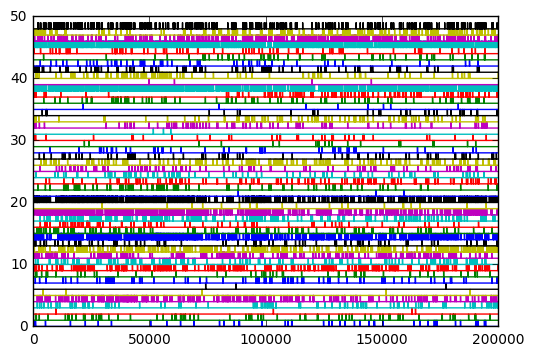

In [9]:
X=read_spike_train('/home/honglei/projects/heterlearning/data/sleep_awake/BWRat17_121712_16.txt', 1, 1000)
visualSeries(X)

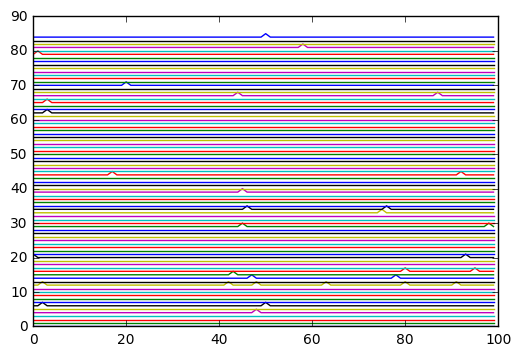

In [9]:
X=np.genfromtxt('/home/honglei/projects/heterlearning/data/small/truncated_23_0001.csv', delimiter=',')
visualSeries(X[:100,:])

In [2]:
## supervised training
with tf.device('/gpu:1'):
    train_multi_rnn.FLAGS.log_dir='/home/honglei/projects/heterlearning/log_dir'
    m=train_multi_rnn.TrainMultiRNN('/home/honglei/projects/heterlearning/data/shuffle_10/', fix_shared=False)
m.sup_train('train_best.ckt')

Reading data
-------------------
Building model

Building model for 23_04.csv with label 1


TypeError: _initializer() got an unexpected keyword argument 'partition_info'

In [2]:
# unsupervised training for test data
with tf.device('/gpu:1'):
    train_multi_rnn.FLAGS.log_dir='/home/honglei/projects/heterlearning/log_dir'
    m=train_multi_rnn.TrainMultiRNN('/home/honglei/projects/heterlearning/data/shuffle_10_test/', fix_shared=True)
m.partially_train('/home/honglei/projects/heterlearning/log_dir/train_best.ckt', 'test_best.ckt')

Reading data
-------------------
Building model

Building model for 23_08.csv with label 1
Training variables:
model/23_08.csv/input_w:0
model/23_08.csv/rec_bias:0

Building model for 23_09.csv with label 1
Training variables:
model/23_09.csv/input_w:0
model/23_09.csv/rec_bias:0

Building model for 21_07.csv with label 0
Training variables:
model/21_07.csv/input_w:0
model/21_07.csv/rec_bias:0

Building model for 21_09.csv with label 0
Training variables:
model/21_09.csv/input_w:0
model/21_09.csv/rec_bias:0

Building model for 23_06.csv with label 1
Training variables:
model/23_06.csv/input_w:0
model/23_06.csv/rec_bias:0

Building model for 23_07.csv with label 1
Training variables:
model/23_07.csv/input_w:0
model/23_07.csv/rec_bias:0

Building model for 21_06.csv with label 0
Training variables:
model/21_06.csv/input_w:0
model/21_06.csv/rec_bias:0

Building model for 21_08.csv with label 0
Training variables:
model/21_08.csv/input_w:0
model/21_08.csv/rec_bias:0

Shared variables:
model

In [2]:
# get accuracy for test data
with tf.device('/gpu:1'):
    train_multi_rnn.FLAGS.log_dir='/home/honglei/projects/heterlearning/log_dir'
    m=train_multi_rnn.TrainMultiRNN('/home/honglei/projects/heterlearning/data/shuffle_10_test/', fix_shared=True)
m.restore('/home/honglei/projects/heterlearning/log_dir/test_best.ckt')
acc, labels, states = m.get_accuracy()
print acc

Reading data
-------------------
Building model

Building model for 23_08.csv with label 1
Training variables:
model/23_08.csv/input_w:0
model/23_08.csv/rec_bias:0

Building model for 23_09.csv with label 1
Training variables:
model/23_09.csv/input_w:0
model/23_09.csv/rec_bias:0

Building model for 21_07.csv with label 0
Training variables:
model/21_07.csv/input_w:0
model/21_07.csv/rec_bias:0

Building model for 21_09.csv with label 0
Training variables:
model/21_09.csv/input_w:0
model/21_09.csv/rec_bias:0

Building model for 23_06.csv with label 1
Training variables:
model/23_06.csv/input_w:0
model/23_06.csv/rec_bias:0

Building model for 23_07.csv with label 1
Training variables:
model/23_07.csv/input_w:0
model/23_07.csv/rec_bias:0

Building model for 21_06.csv with label 0
Training variables:
model/21_06.csv/input_w:0
model/21_06.csv/rec_bias:0

Building model for 21_08.csv with label 0
Training variables:
model/21_08.csv/input_w:0
model/21_08.csv/rec_bias:0

Shared variables:
model

Reading data
-------------------
Building model

Building model for 23_04.csv with label 1
Training variables:
model/23_04.csv/input_w:0
model/23_04.csv/output_w:0

Building model for 23_01.csv with label 1
Training variables:
model/23_01.csv/input_w:0
model/23_01.csv/output_w:0

Building model for 21_02.csv with label 0
Training variables:
model/21_02.csv/input_w:0
model/21_02.csv/output_w:0

Building model for 21_03.csv with label 0
Training variables:
model/21_03.csv/input_w:0
model/21_03.csv/output_w:0

Building model for 23_03.csv with label 1
Training variables:
model/23_03.csv/input_w:0
model/23_03.csv/output_w:0

Building model for 21_01.csv with label 0
Training variables:
model/21_01.csv/input_w:0
model/21_01.csv/output_w:0

Building model for 23_02.csv with label 1
Training variables:
model/23_02.csv/input_w:0
model/23_02.csv/output_w:0

Building model for 21_04.csv with label 0
Training variables:
model/21_04.csv/input_w:0
model/21_04.csv/output_w:0

Building model for 21_0

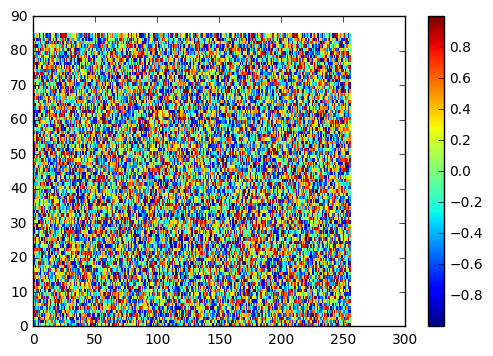

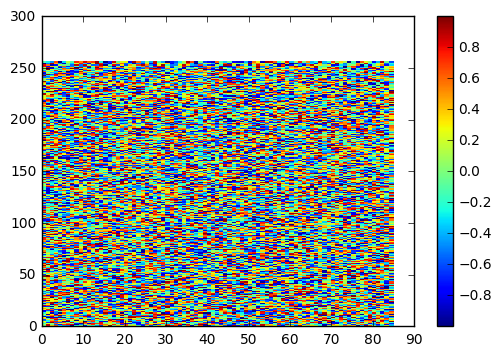

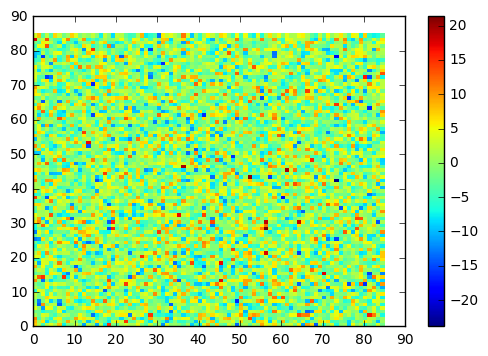

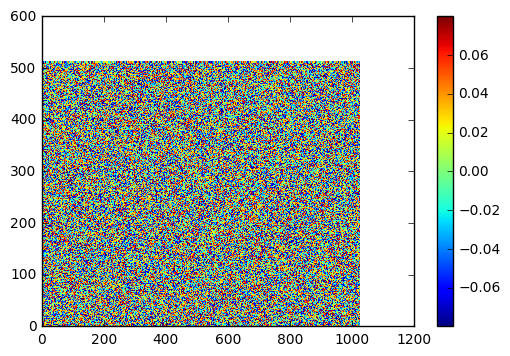

after restore


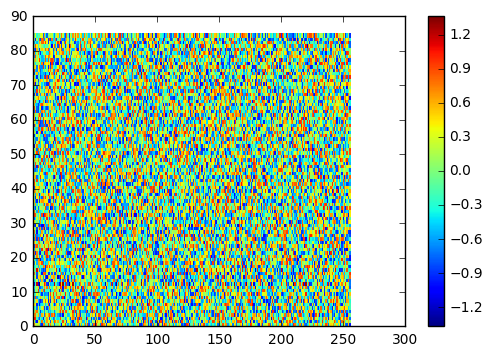

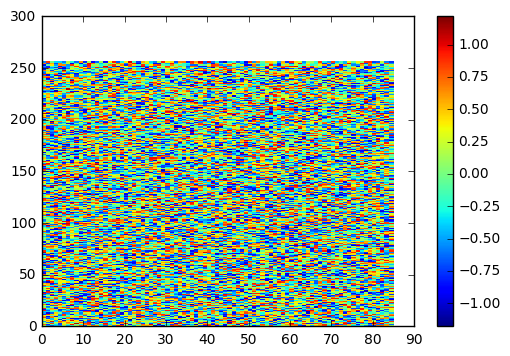

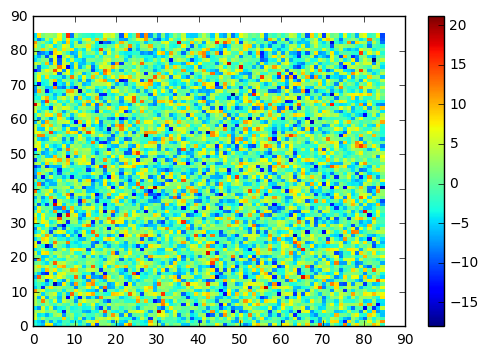

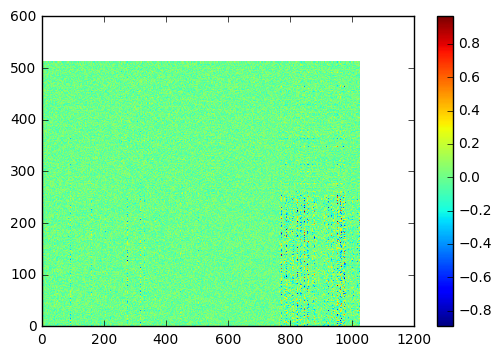

0/8 speed: 18 batches/sec
1/8 speed: 34 batches/sec
2/8 speed: 50 batches/sec
3/8 speed: 65 batches/sec
4/8 speed: 80 batches/sec
5/8 speed: 94 batches/sec
6/8 speed: 107 batches/sec
7/8 speed: 107 batches/sec
Label prediction by recording:
1 : 1
1 : 1
0 : 0
0 : 0
1 : 1
0 : 0
1 : 1
0 : 0
0 : 0
1 : 1
1.0


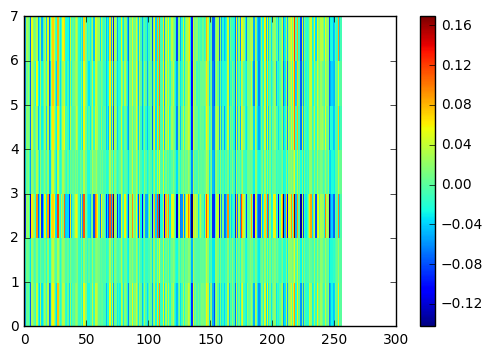

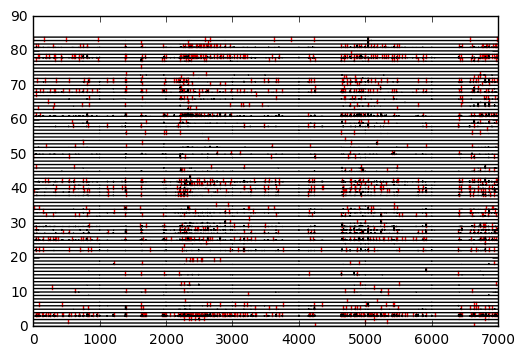

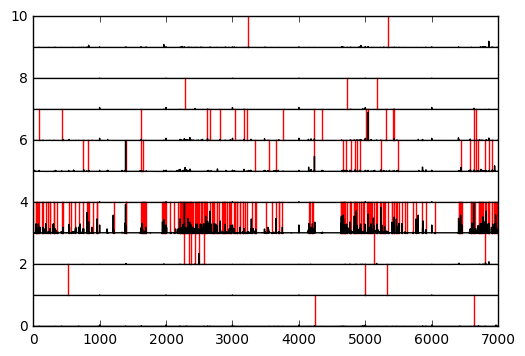

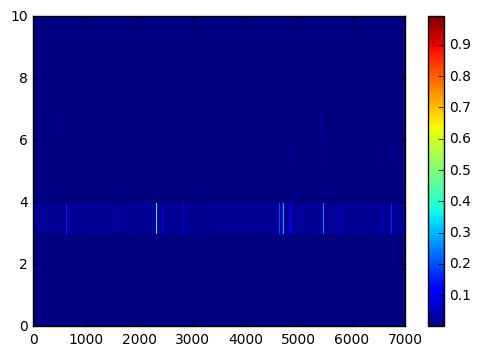

[[  2.64861211e-02   8.96183847e-05   1.42371410e-03 ...,   1.29157966e-02
    3.76473274e-03   1.12128500e-02]
 [  1.42686313e-03   5.04056370e-05   3.73154460e-03 ...,   9.71424486e-03
    1.51536748e-04   7.39830575e-05]
 [  5.04131895e-04   4.75833667e-06   5.59657346e-04 ...,   7.91699451e-04
    2.37158826e-03   1.83632714e-04]
 ..., 
 [  6.45751366e-04   4.91148559e-04   4.24034253e-04 ...,   2.54245591e-04
    1.52052298e-05   3.86405649e-04]
 [  2.75791652e-04   1.04365915e-06   8.49847449e-04 ...,   7.69508886e-04
    3.36992161e-05   6.84862770e-03]
 [  4.50621505e-04   2.01212606e-04   1.97903995e-04 ...,   2.64207134e-04
    2.51037045e-06   1.79385766e-04]]


In [2]:
with tf.device('/gpu:1'):
    train_multi_rnn.FLAGS.log_dir='/home/honglei/projects/heterlearning/log_dir'
    m=train_multi_rnn.TrainMultiRNN('/home/honglei/projects/heterlearning/data/shuffle_10/', fix_shared=True)

print "before restore"
input_w=m.get_value_of_variable('model/23_01.csv/input_w:0')
output_w=m.get_value_of_variable('model/23_01.csv/output_w:0')

plt.figure()
plt.pcolor(input_w)
plt.colorbar()
plt.show()

plt.figure()
plt.pcolor(output_w)
plt.colorbar()
plt.show()

plt.figure()
plt.pcolor(np.dot(input_w,np.copy(output_w)))
plt.colorbar()
plt.show()

lstm_w=m.get_value_of_variable('model/shared_variables/Cell0/W_0:0')
plt.figure()
plt.pcolor(lstm_w)
plt.colorbar()
plt.show()

m.restore('/home/honglei/projects/heterlearning/log_dir/train_best_0.ckt')

print "after restore"
input_w=m.get_value_of_variable('model/23_01.csv/input_w:0')
output_w=m.get_value_of_variable('model/23_01.csv/output_w:0')

plt.figure()
plt.pcolor(input_w)
plt.colorbar()
plt.show()

plt.figure()
plt.pcolor(output_w)
plt.colorbar()
plt.show()

plt.figure()
plt.pcolor(np.dot(input_w,np.copy(output_w)))
plt.colorbar()
plt.show()

lstm_w=m.get_value_of_variable('model/shared_variables/Cell0/W_0:0')
plt.figure()
plt.pcolor(lstm_w)
plt.colorbar()
plt.show()

acc, labels, states = m.get_accuracy()
print acc
plt.figure()
plt.pcolor(states[0])
plt.colorbar()
plt.show()

X_list, predict_list=m.get_train_data()
X=X_list[0]
predicts=predict_list[0]
overlayPredicts(X,predicts)
#visualSeries(X[:,0:10])
mean = np.mean(predicts)
std = np.std(predicts)
#visualSeries(predicts[:,0:10])
overlayPredicts(X[:,0:10],predicts[:,0:10])
plt.figure()
plt.pcolor(predicts[:,0:10].T)
plt.colorbar()
plt.show()
print predicts[:,0:10]

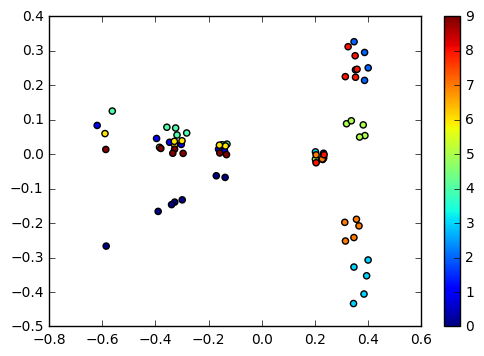

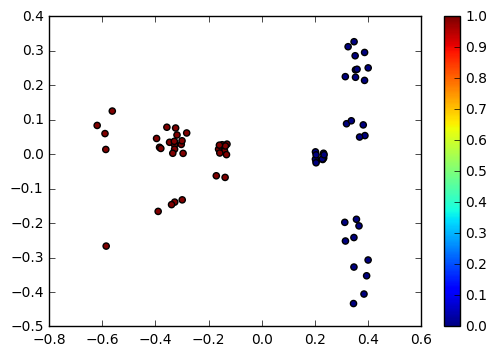

In [3]:
# visualize states using t-SNE
# given: states, labels
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


# convert state and label
stacked_states=np.array([])
stacked_labels1 = []
stacked_labels2 = []
for i in range(len(labels)):
    if i == 0:
        stacked_states = states[0]
    else:
        stacked_states = np.vstack([stacked_states, states[i]])
    stacked_labels1.extend(map(int, [i]*len(states[i])))
    stacked_labels2.extend(map(int, [labels[i]]*len(states[i])))

pca = PCA(n_components=2)
reduced_states = pca.fit_transform(stacked_states)
# tsne = TSNE(n_components=2, random_state=0)
# reduced_states = tsne.fit_transform(stacked_states)
plt.scatter(reduced_states[:,0], reduced_states[:,1], c=stacked_labels1, cmap=plt.cm.get_cmap("jet"))
plt.colorbar()

plt.figure()
plt.scatter(reduced_states[:,0], reduced_states[:,1], c=stacked_labels2, cmap=plt.cm.get_cmap("jet"))
plt.colorbar()
plt.show()

In [2]:
with tf.device('/gpu:1'):
    train_multi_rnn.FLAGS.log_dir='/home/honglei/projects/heterlearning/log_dir'
    m=train_multi_rnn.TrainMultiRNN('/home/honglei/projects/heterlearning/data/shuffle_23/', fix_shared=True)

m.restore('/home/honglei/projects/heterlearning/log_dir/best.ckt')

acc, labels, states = m.get_accuracy()
print acc


Reading data
-------------------
Building model

Building model for 23_04.csv with label 1
Training variables:
model/23_04.csv/input_w:0
model/23_04.csv/output_w:0

Building model for 23_01.csv with label 1
Training variables:
model/23_01.csv/input_w:0
model/23_01.csv/output_w:0

Building model for 23_03.csv with label 1
Training variables:
model/23_03.csv/input_w:0
model/23_03.csv/output_w:0

Building model for 23_02.csv with label 1
Training variables:
model/23_02.csv/input_w:0
model/23_02.csv/output_w:0

Building model for 23_05.csv with label 1
Training variables:
model/23_05.csv/input_w:0
model/23_05.csv/output_w:0

Shared variables:
model/shared_variables/Cell0/W_0:0
model/shared_variables/Cell0/B:0
model/shared_variables/softmax_w:0
-------------------
Starting session
0/8 speed: 24 batches/sec
1/8 speed: 46 batches/sec
2/8 speed: 67 batches/sec
3/8 speed: 86 batches/sec
4/8 speed: 105 batches/sec
5/8 speed: 122 batches/sec
6/8 speed: 139 batches/sec
7/8 speed: 139 batches/sec
L

In [3]:
plt.figure()
plt.pcolor(states[2])#[:,0:50])
plt.colorbar()
plt.figure()
plt.pcolor(states[3])#[:,0:50])
plt.colorbar()
plt.figure()
plt.pcolor(states[5])#[:,0:50])
plt.colorbar()
plt.figure()
plt.pcolor(states[7])#[:,0:50])
plt.colorbar()
plt.figure()
plt.pcolor(states[8])#[:,0:50])
plt.colorbar()
plt.show()

IndexError: list index out of range

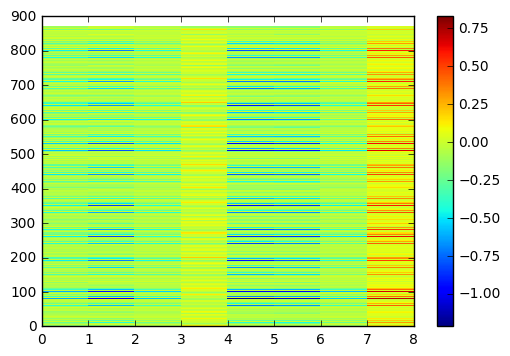

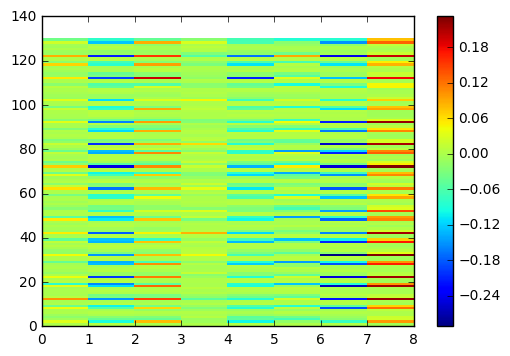

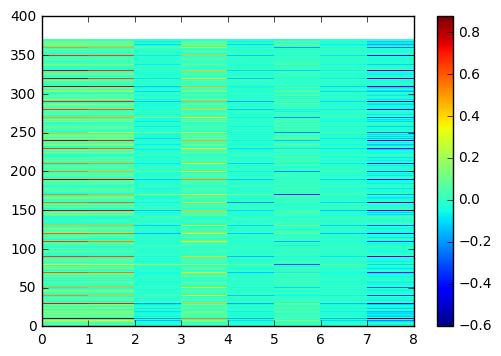

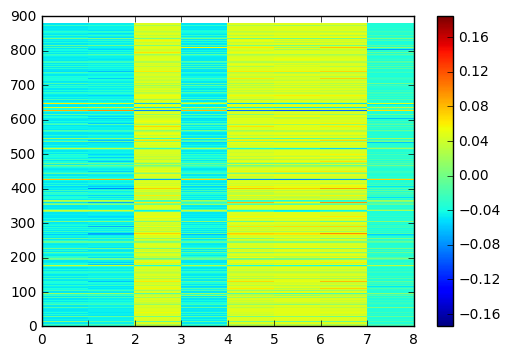

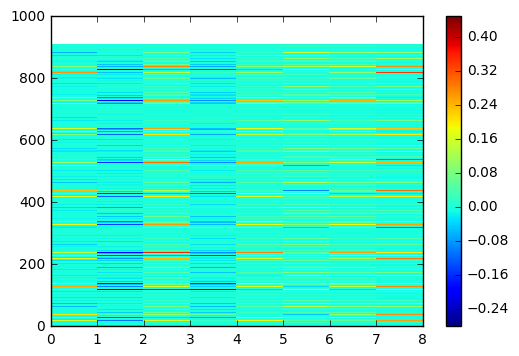

In [3]:
plt.figure()
plt.pcolor(states[0])#[:,0:50])
plt.colorbar()
plt.figure()
plt.pcolor(states[1])#[:,0:50])
plt.colorbar()
plt.figure()
plt.pcolor(states[2])#[:,0:50])
plt.colorbar()
plt.figure()
plt.pcolor(states[3])#[:,0:50])
plt.colorbar()
plt.figure()
plt.pcolor(states[4])#[:,0:50])
plt.colorbar()
plt.show()

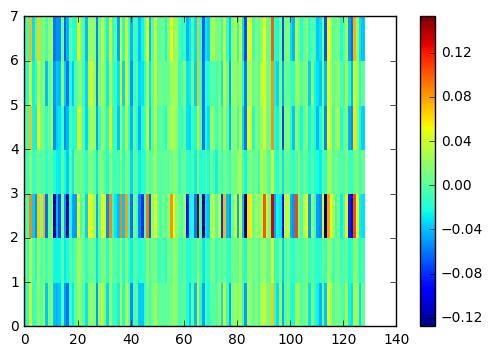

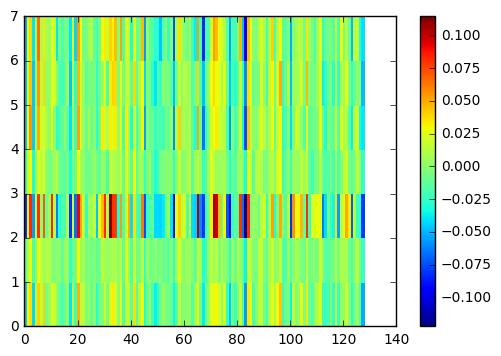

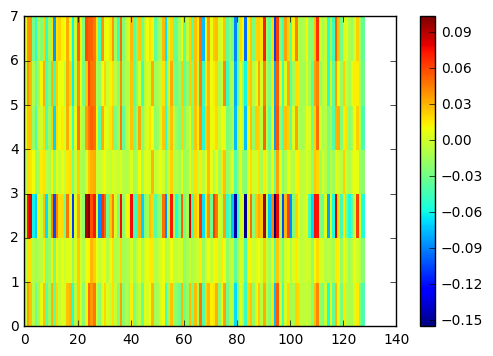

In [3]:
# 1 : 1
# 1 : 1
# 0 : 1
# 0 : 1
# 1 : 1
# 1 : 1
# 0 : 1
# 0 : 1
plt.figure()
plt.pcolor(states[0])#[:,0:50])
plt.colorbar()
plt.figure()
plt.pcolor(states[1])#[:,0:50])
plt.colorbar()
plt.figure()
plt.pcolor(states[2])#[:,0:50])
plt.colorbar()
#plt.figure()
#plt.pcolor(states[3])#[:,0:50])
#plt.colorbar()
#plt.figure()
#plt.pcolor(states[4])#[:,0:50])
#plt.colorbar()
#plt.figure()
#plt.pcolor(states[5])#[:,0:50])
#plt.colorbar()
#plt.figure()
#plt.pcolor(states[6])#[:,0:50])
#plt.colorbar()
#plt.figure()
#plt.pcolor(states[7])#[:,0:50])
#plt.colorbar()
plt.show()

Reading data
-------------------
Building model

Building model for 23_04.csv with label 1
Training variables:
model/23_04.csv/input_w:0
model/23_04.csv/output_w:0

Building model for 23_01.csv with label 1
Training variables:
model/23_01.csv/input_w:0
model/23_01.csv/output_w:0

Building model for 23_03.csv with label 1
Training variables:
model/23_03.csv/input_w:0
model/23_03.csv/output_w:0

Building model for 23_02.csv with label 1
Training variables:
model/23_02.csv/input_w:0
model/23_02.csv/output_w:0

Building model for 23_05.csv with label 1
Training variables:
model/23_05.csv/input_w:0
model/23_05.csv/output_w:0

Shared variables:
model/shared_variables/Cell0/W_0:0
model/shared_variables/Cell0/B:0
model/shared_variables/softmax_w:0
-------------------
Starting session


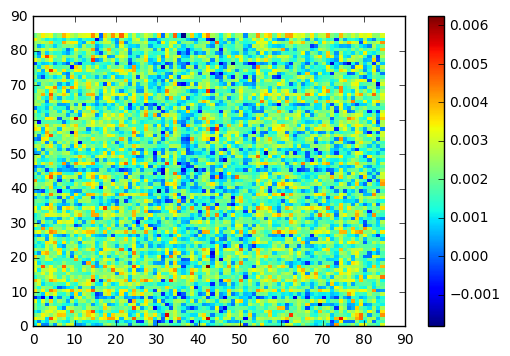

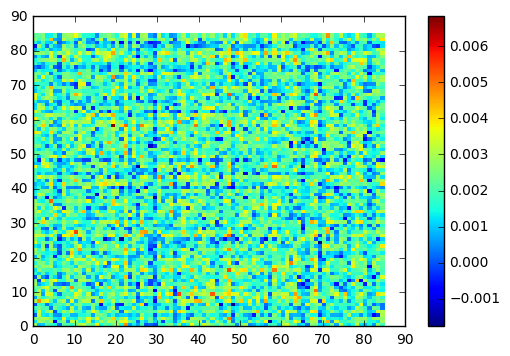

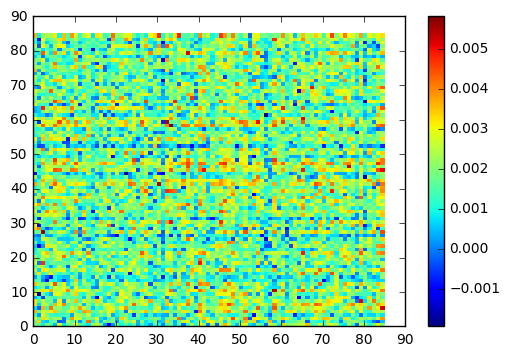

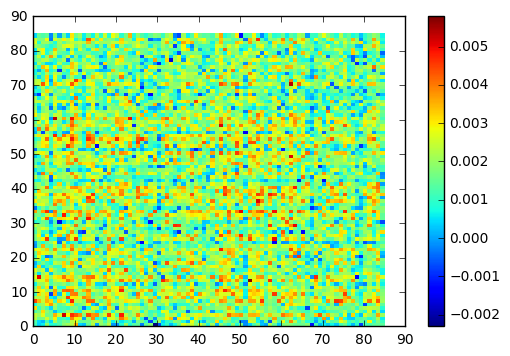

In [3]:
with tf.device('/gpu:1'):
    train_multi_rnn.FLAGS.log_dir='/home/honglei/projects/heterlearning/log_dir'
    m=train_multi_rnn.TrainMultiRNN('/home/honglei/projects/heterlearning/data/shuffle_23/', fix_shared=True)

m.restore('/home/honglei/projects/heterlearning/log_dir/best.ckt')

input_w=m.get_value_of_variable('model/23_01.csv/inbput_w:0')
#output_w=m.get_value_of_variable('model/23_01.csv/output_w:0')
input_norms=np.linalg.norm(input_w, axis=1)

origin_orders=np.genfromtxt('/home/honglei/projects/heterlearning/data/orders.txt', delimiter=',').astype(int)


for i in range(2, 6):
    v_name='model/23_0{0}.csv/input_w:0'.format(i)
    o_w=input_w[origin_orders[i-2,:],:]
    o_norms=np.linalg.norm(o_w, axis=1)
    new_w=m.get_value_of_variable(v_name)
    new_norms=np.linalg.norm(new_w, axis=1)
    similarities=np.dot(new_w, o_w.T) / np.dot(new_norms, o_norms)
    matches=np.argsort(similarities)[:,-10:]
    # print ','.join(map(str,list(origin_orders)))
    # print matches
    
    
    plt.figure()
    plt.pcolor(similarities)
    plt.colorbar()
    plt.show()
